In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

currentDirectory = os.getcwd()

# Analysis for New York City

# Importing New York City COVID-19 cases .csv (data from https://www1.nyc.gov/site/doh/covid/covid-19-data.page)

In [4]:
covid_df = pd.read_csv('nyc/nyc_covid.csv')

In [5]:
covid_df['DATE_OF_INTEREST'] = pd.to_datetime(covid_df['DATE_OF_INTEREST'])

In [6]:
covid_df = covid_df.set_index('DATE_OF_INTEREST')

# Importing economy topics .csv

In [7]:
economy_df = pd.read_csv('nyc/economy_topics.csv')

In [8]:
economy_df_clean = economy_df.replace('<1', 0)

In [9]:
economy_df_clean["Day"] = pd.to_datetime(economy_df_clean["Day"], dayfirst = True)

In [10]:
economy_df_clean.dtypes

Day                            datetime64[ns]
Economy: (New York NY)                  int64
Recession: (New York NY)               object
Unemployment: (New York NY)             int64
Stock market: (New York NY)             int64
dtype: object

In [11]:
economy_df_clean.columns = ['Day', 'Economy_terms', 'Recession_terms', 'Unemployment_terms', 'Stock_market_terms']

In [12]:
economy_df_clean['Recession_terms'] = pd.to_numeric(economy_df_clean['Recession_terms'])
economy_df_clean.dtypes

Day                   datetime64[ns]
Economy_terms                  int64
Recession_terms                int64
Unemployment_terms             int64
Stock_market_terms             int64
dtype: object

In [13]:
economy_df_clean = economy_df_clean.set_index('Day')

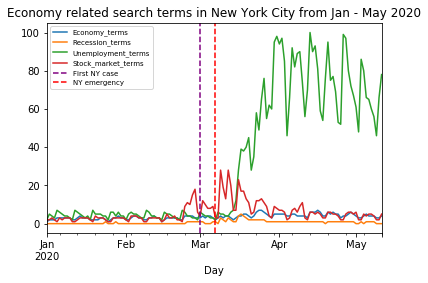

In [14]:
fig = economy_df_clean.plot()
fig.axvline("2020-03-01", color = "purple", linestyle="--", label = "First NY case")
fig.axvline("2020-03-07", color = "red", linestyle="--", label = "NY emergency")
fig.legend(loc='upper left', prop ={'size': 7})
fig.set_title("Economy related search terms in New York City from Jan - May 2020")
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('nyc/economy_plot.png', dpi = 200)

# Importing responses topics .csv

In [15]:
responses_df = pd.read_csv('nyc/responses_topics.csv')

In [16]:
responses_df_clean = responses_df.replace('<1', 0)

In [17]:
responses_df_clean["Day"] = pd.to_datetime(responses_df_clean["Day"], dayfirst = True)

In [18]:
responses_df_clean.dtypes

Day                                 datetime64[ns]
Social distancing: (New York NY)            object
Quarantine: (New York NY)                   object
Mask: (New York NY)                          int64
Symptom: (New York NY)                       int64
Herd immunity: (New York NY)                object
dtype: object

In [19]:
responses_df_clean.columns = ['Day', 'Social_distancing_terms', 'Quarantine_terms', 'Mask_terms', 'Symptom_terms', 'Herd_immunity_terms']

In [20]:
responses_df_clean[['Social_distancing_terms', 'Quarantine_terms', 'Herd_immunity_terms']] = responses_df_clean[['Social_distancing_terms', 'Quarantine_terms', 'Herd_immunity_terms']].apply(pd.to_numeric, errors='coerce')
responses_df_clean.dtypes

Day                        datetime64[ns]
Social_distancing_terms             int64
Quarantine_terms                    int64
Mask_terms                          int64
Symptom_terms                       int64
Herd_immunity_terms                 int64
dtype: object

In [21]:
responses_df_clean = responses_df_clean.set_index('Day')

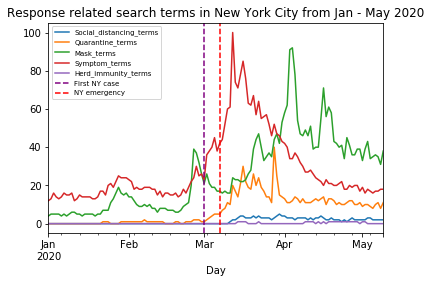

In [22]:
fig = responses_df_clean.plot()
fig.axvline("2020-03-01", color = "purple", linestyle="--", label = "First NY case")
fig.axvline("2020-03-07", color = "red", linestyle="--", label = "NY emergency")
fig.legend(loc='upper left', prop ={'size': 7})
fig.set_title("Response related search terms in New York City from Jan - May 2020")
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('nyc/responses_plot.png', dpi = 200)

# Importing travel topics .csv

In [23]:
travel_df = pd.read_csv('nyc/travel_topics.csv')

In [24]:
travel_df_clean = travel_df.replace('<1', 0)

In [25]:
travel_df_clean["Day"] = pd.to_datetime(travel_df_clean["Day"], dayfirst = True)

In [26]:
travel_df_clean.dtypes

Day                                    datetime64[ns]
Travel: (New York NY)                           int64
Holiday: (New York NY)                          int64
Flight: (New York NY)                           int64
Domestic flight: (New York NY)                 object
International flight: (New York NY)            object
dtype: object

In [27]:
travel_df_clean.columns = ['Day', 'Travel_terms', 'Holiday_terms', 'Flight_terms', 'Domestic_flight_terms', 'International_flight_terms']

In [28]:
travel_df_clean[['Domestic_flight_terms', 'International_flight_terms']] = travel_df_clean[['Domestic_flight_terms', 'International_flight_terms']].apply(pd.to_numeric, errors='coerce')
travel_df_clean.dtypes

Day                           datetime64[ns]
Travel_terms                           int64
Holiday_terms                          int64
Flight_terms                           int64
Domestic_flight_terms                  int64
International_flight_terms             int64
dtype: object

In [29]:
travel_df_clean = travel_df_clean.set_index('Day')

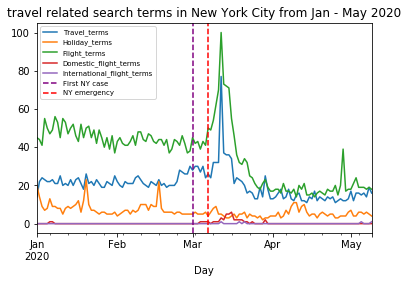

In [30]:
fig = travel_df_clean.plot()
fig.axvline("2020-03-01", color = "purple", linestyle="--", label = "First NY case")
fig.axvline("2020-03-07", color = "red", linestyle="--", label = "NY emergency")
fig.legend(loc='upper left', prop ={'size': 7})
fig.set_title("travel related search terms in New York City from Jan - May 2020")
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('nyc/travel_plot.png', dpi = 200)

# Focusing on COVID-19 cases, with twin axis plots (New York City)

economy x COVID

In [31]:
economy_covid_df = economy_df_clean.join(covid_df).fillna(0)
economy_covid_df.dtypes

Economy_terms           int64
Recession_terms         int64
Unemployment_terms      int64
Stock_market_terms      int64
Cases                 float64
Hospitalizations      float64
Deaths                float64
dtype: object

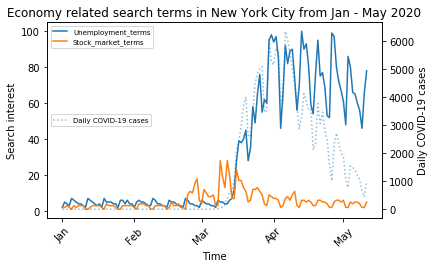

In [32]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

# ax.plot(economy_covid_df.Economy_terms)
# ax.plot(economy_covid_df.Recession_terms)
ax.plot(economy_covid_df.Unemployment_terms)
ax.plot(economy_covid_df.Stock_market_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(economy_covid_df.Cases, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Economy related search terms in New York City from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('nyc/economy_covid_plot.png', dpi = 200, bbox_inches='tight')

Responses x COVID

In [33]:
responses_covid_df = responses_df_clean.join(covid_df).fillna(0)
responses_covid_df.dtypes

Social_distancing_terms      int64
Quarantine_terms             int64
Mask_terms                   int64
Symptom_terms                int64
Herd_immunity_terms          int64
Cases                      float64
Hospitalizations           float64
Deaths                     float64
dtype: object

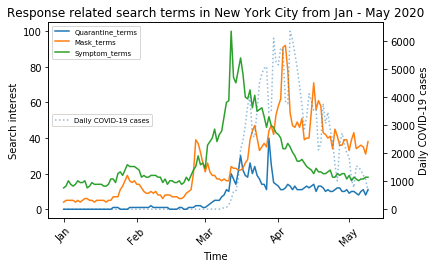

In [34]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

# ax.plot(responses_covid_df.Social_distancing_terms)
ax.plot(responses_covid_df.Quarantine_terms)
ax.plot(responses_covid_df.Mask_terms)
ax.plot(responses_covid_df.Symptom_terms)
# ax.plot(responses_covid_df.Herd_immunity_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(responses_covid_df.Cases, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Response related search terms in New York City from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('nyc/responses_covid_plot.png', dpi = 200, bbox_inches='tight')

Travel x COVID

In [35]:
travel_covid_df = travel_df_clean.join(covid_df).fillna(0)
travel_covid_df.dtypes

Travel_terms                    int64
Holiday_terms                   int64
Flight_terms                    int64
Domestic_flight_terms           int64
International_flight_terms      int64
Cases                         float64
Hospitalizations              float64
Deaths                        float64
dtype: object

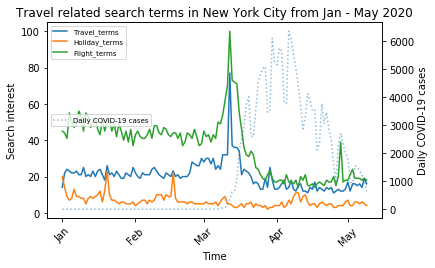

In [36]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

ax.plot(travel_covid_df.Travel_terms )
ax.plot(travel_covid_df.Holiday_terms)
ax.plot(travel_covid_df.Flight_terms)
# ax.plot(travel_covid_df.Domestic_flight_terms)
# ax.plot(travel_covid_df.International_flight_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(travel_covid_df.Cases, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Travel related search terms in New York City from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('nyc/travel_covid_plot.png', dpi = 200, bbox_inches='tight')

# Analysis for Rio De Janeiro

# Importing rio_covid .csv (data processed from https://covid.saude.gov.br/)

In [37]:
rio_covid_df = pd.read_csv('rio/rio_covid.csv')

In [38]:
rio_covid_df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,daily
0,Sudeste,RJ,Rio de Janeiro,33,330455,33005,Metropolitana I,2020-03-29,14,6718903,516,13,27
1,Sudeste,RJ,Rio de Janeiro,33,330455,33005,Metropolitana I,2020-03-30,14,6718903,553,13,37
2,Sudeste,RJ,Rio de Janeiro,33,330455,33005,Metropolitana I,2020-03-31,14,6718903,586,18,33
3,Sudeste,RJ,Rio de Janeiro,33,330455,33005,Metropolitana I,2020-04-01,14,6718903,697,20,111
4,Sudeste,RJ,Rio de Janeiro,33,330455,33005,Metropolitana I,2020-04-02,14,6718903,798,31,101


In [39]:
rio_covid_df = rio_covid_df[['data', 'daily']]
rio_covid_df.columns = ['date', 'daily']
rio_covid_df.head()


,date,daily
0,2020-03-29,27
1,2020-03-30,37
2,2020-03-31,33
3,2020-04-01,111
4,2020-04-02,101


In [40]:
rio_covid_df['date'] = pd.to_datetime(rio_covid_df['date'])

In [41]:
rio_covid_df = rio_covid_df.set_index('date')
rio_covid_df

,daily
date,
2020-03-29,27
2020-03-30,37
2020-03-31,33
2020-04-01,111
2020-04-02,101
2020-04-03,69
2020-04-04,115
2020-04-05,86
2020-04-06,42


# Importing rio_economy_topics.csv

In [42]:
rio_economy_df = pd.read_csv('rio/rio_economy_topics.csv')

In [43]:
rio_economy_df
rio_economy_df.dtypes

Day                                        object
Unemployment: (State of Rio de Janeiro)     int64
Stock market: (State of Rio de Janeiro)     int64
dtype: object

In [44]:
rio_economy_df["Day"] = pd.to_datetime(rio_economy_df["Day"], dayfirst = True)

In [45]:
rio_economy_df.dtypes

Day                                        datetime64[ns]
Unemployment: (State of Rio de Janeiro)             int64
Stock market: (State of Rio de Janeiro)             int64
dtype: object

In [46]:
rio_economy_df.columns = ['Day', 'Unemployment_terms', 'Stock_market_terms']

In [47]:
rio_economy_df_clean = rio_economy_df.set_index('Day')

# Importing rio_responses_topics.csv

In [48]:
rio_responses_df = pd.read_csv('rio/rio_responses_topics.csv')

In [49]:
rio_responses_df.dtypes

Day                                      object
Quarantine: (State of Rio de Janeiro)    object
Mask: (State of Rio de Janeiro)           int64
Symptom: (State of Rio de Janeiro)        int64
dtype: object

In [50]:
rio_responses_df_clean = rio_responses_df.replace('<1', 0)

In [51]:
rio_responses_df_clean["Day"] = pd.to_datetime(rio_responses_df_clean["Day"], dayfirst = True)

In [52]:
rio_responses_df_clean.dtypes

Day                                      datetime64[ns]
Quarantine: (State of Rio de Janeiro)            object
Mask: (State of Rio de Janeiro)                   int64
Symptom: (State of Rio de Janeiro)                int64
dtype: object

In [53]:
rio_responses_df_clean.columns = ['Day', 'Quarantine_terms', 'Mask_terms', 'Symptom_terms']

In [54]:
rio_responses_df_clean['Quarantine_terms'] = rio_responses_df_clean['Quarantine_terms'].apply(pd.to_numeric, errors='coerce')
rio_responses_df_clean.dtypes

Day                 datetime64[ns]
Quarantine_terms             int64
Mask_terms                   int64
Symptom_terms                int64
dtype: object

In [55]:
rio_responses_df_clean = rio_responses_df_clean.set_index('Day')

# Importing rio_travel_topics.csv

In [56]:
rio_travel_df = pd.read_csv('rio/rio_travel_topics.csv')

In [57]:
rio_travel_df_clean = rio_travel_df.replace('<1', 0)

In [58]:
rio_travel_df_clean["Day"] = pd.to_datetime(rio_travel_df_clean["Day"], dayfirst = True)

In [59]:
rio_travel_df_clean.dtypes

Day                                   datetime64[ns]
Travel: (State of Rio de Janeiro)             object
Holiday: (State of Rio de Janeiro)             int64
Flight: (State of Rio de Janeiro)              int64
dtype: object

In [60]:
rio_travel_df_clean.columns = ['Day', 'Travel_terms', 'Holiday_terms', 'Flight_terms']

In [61]:
rio_travel_df_clean['Travel_terms'] = rio_travel_df_clean['Travel_terms'].apply(pd.to_numeric, errors='coerce')
rio_travel_df_clean.dtypes

Day              datetime64[ns]
Travel_terms              int64
Holiday_terms             int64
Flight_terms              int64
dtype: object

In [62]:
rio_travel_df_clean = rio_travel_df_clean.set_index('Day')

# Focusing on COVID-19 cases, with twin axis plots (Rio De Janeiro)

economy x COVID

In [63]:
rio_economy_covid_df = rio_economy_df_clean.join(rio_covid_df).fillna(0)
rio_economy_covid_df.dtypes

Unemployment_terms      int64
Stock_market_terms      int64
daily                 float64
dtype: object

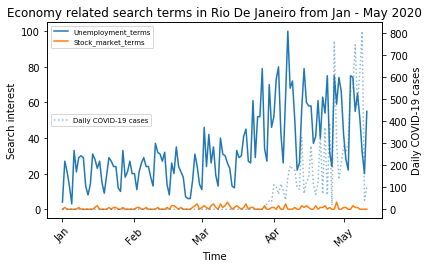

In [64]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

# ax.plot(economy_covid_df.Economy_terms)
# ax.plot(economy_covid_df.Recession_terms)
ax.plot(rio_economy_covid_df.Unemployment_terms)
ax.plot(rio_economy_covid_df.Stock_market_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(rio_economy_covid_df.daily, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Economy related search terms in Rio De Janeiro from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('rio/rio_economy_covid_plot.png', dpi = 200, bbox_inches='tight')

Responses x COVID

In [65]:
rio_responses_covid_df = rio_responses_df_clean.join(rio_covid_df).fillna(0)
rio_responses_covid_df.dtypes

Quarantine_terms      int64
Mask_terms            int64
Symptom_terms         int64
daily               float64
dtype: object

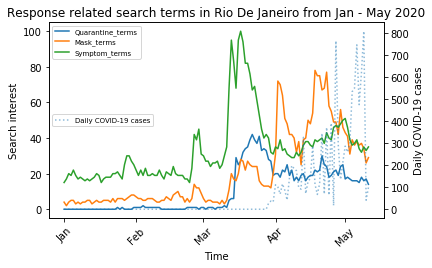

In [66]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

# ax.plot(responses_covid_df.Social_distancing_terms)
ax.plot(rio_responses_covid_df.Quarantine_terms)
ax.plot(rio_responses_covid_df.Mask_terms)
ax.plot(rio_responses_covid_df.Symptom_terms)
# ax.plot(responses_covid_df.Herd_immunity_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(rio_responses_covid_df.daily, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Response related search terms in Rio De Janeiro from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('rio/rio_responses_covid_plot.png', dpi = 200, bbox_inches='tight')

Travel x COVID

In [67]:
rio_travel_covid_df = rio_travel_df_clean.join(rio_covid_df).fillna(0)
rio_travel_covid_df.dtypes

Travel_terms       int64
Holiday_terms      int64
Flight_terms       int64
daily            float64
dtype: object

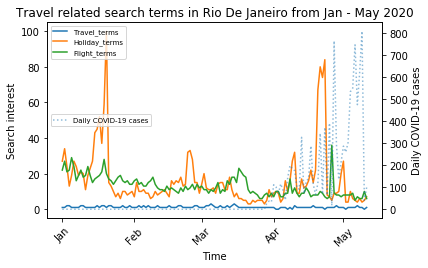

In [68]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

ax.plot(rio_travel_covid_df.Travel_terms )
ax.plot(rio_travel_covid_df.Holiday_terms)
ax.plot(rio_travel_covid_df.Flight_terms)
# ax.plot(travel_covid_df.Domestic_flight_terms)
# ax.plot(travel_covid_df.International_flight_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(rio_travel_covid_df.daily, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Travel related search terms in Rio De Janeiro from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('rio/rio_travel_covid_plot.png', dpi = 200, bbox_inches='tight')

# Analysis for San Francisco

# Importing sf_covid.csv (data processed from https://data.sfgov.org/COVID-19/COVID-19-Cases-Summarized-by-Date-Transmission-and/tvq9-ec9w)

In [69]:
sf_covid_df = pd.read_csv('sf/sf_covid.csv')

In [70]:
sf_covid_df.head()

,Date,Transmission Category,Case Disposition,Case Count
0,5/3/2020,Community,Confirmed,2
1,6/3/2020,From Contact,Confirmed,4
2,7/3/2020,From Contact,Confirmed,1
3,8/3/2020,From Contact,Confirmed,6
4,9/3/2020,From Contact,Confirmed,1


In [71]:
sf_covid_df = sf_covid_df[['Date', 'Case Count']]
sf_covid_df.columns = ['date', 'daily']
sf_covid_df.head()

,date,daily
0,5/3/2020,2
1,6/3/2020,4
2,7/3/2020,1
3,8/3/2020,6
4,9/3/2020,1


In [72]:
sf_covid_df['date'] = pd.to_datetime(sf_covid_df['date'], dayfirst = True)

In [73]:
sf_covid_df = sf_covid_df.set_index('date')
sf_covid_df

,daily
date,
2020-03-05,2
2020-03-06,4
2020-03-07,1
2020-03-08,6
2020-03-09,1
2020-03-11,5
2020-03-12,2
2020-03-12,9
2020-03-14,4


# Importing sf_economy_topics.csv

In [74]:
sf_economy_df = pd.read_csv('sf/sf_economy_topics.csv')

In [75]:
sf_economy_df
sf_economy_df.dtypes

Day                                                  object
Unemployment: (San Francisco-Oakland-San Jose CA)     int64
Stock market: (San Francisco-Oakland-San Jose CA)     int64
dtype: object

In [76]:
sf_economy_df["Day"] = pd.to_datetime(sf_economy_df["Day"], dayfirst = True)

In [77]:
sf_economy_df.dtypes

Day                                                  datetime64[ns]
Unemployment: (San Francisco-Oakland-San Jose CA)             int64
Stock market: (San Francisco-Oakland-San Jose CA)             int64
dtype: object

In [78]:
sf_economy_df.columns = ['Day', 'Unemployment_terms', 'Stock_market_terms']

In [79]:
sf_economy_df_clean = sf_economy_df.set_index('Day')

# Importing sf_responses_topics.csv

In [80]:
sf_responses_df = pd.read_csv('sf/sf_responses_topics.csv')

In [81]:
sf_responses_df.dtypes

Day                                                object
Quarantine: (San Francisco-Oakland-San Jose CA)    object
Mask: (San Francisco-Oakland-San Jose CA)           int64
Symptom: (San Francisco-Oakland-San Jose CA)        int64
dtype: object

In [82]:
sf_responses_df_clean = sf_responses_df.replace('<1', 0)

In [83]:
sf_responses_df_clean["Day"] = pd.to_datetime(sf_responses_df_clean["Day"], dayfirst = True)

In [84]:
sf_responses_df_clean.dtypes

Day                                                datetime64[ns]
Quarantine: (San Francisco-Oakland-San Jose CA)            object
Mask: (San Francisco-Oakland-San Jose CA)                   int64
Symptom: (San Francisco-Oakland-San Jose CA)                int64
dtype: object

In [85]:
sf_responses_df_clean.columns = ['Day', 'Quarantine_terms', 'Mask_terms', 'Symptom_terms']

In [86]:
sf_responses_df_clean['Quarantine_terms'] = sf_responses_df_clean['Quarantine_terms'].apply(pd.to_numeric, errors='coerce')
sf_responses_df_clean.dtypes

Day                 datetime64[ns]
Quarantine_terms             int64
Mask_terms                   int64
Symptom_terms                int64
dtype: object

In [87]:
sf_responses_df_clean = sf_responses_df_clean.set_index('Day')

# Importing sf_travel_topics.csv

In [88]:
sf_travel_df = pd.read_csv('sf/sf_travel_topics.csv')

In [89]:
sf_travel_df_clean = sf_travel_df.replace('<1', 0)

In [90]:
sf_travel_df_clean["Day"] = pd.to_datetime(sf_travel_df_clean["Day"], dayfirst = True)

In [91]:
sf_travel_df_clean.dtypes

Day                                             datetime64[ns]
Travel: (San Francisco-Oakland-San Jose CA)              int64
Holiday: (San Francisco-Oakland-San Jose CA)             int64
Flight: (San Francisco-Oakland-San Jose CA)              int64
dtype: object

In [92]:
sf_travel_df_clean.columns = ['Day', 'Travel_terms', 'Holiday_terms', 'Flight_terms']

In [93]:
sf_travel_df_clean['Travel_terms'] = sf_travel_df_clean['Travel_terms'].apply(pd.to_numeric, errors='coerce')
sf_travel_df_clean.dtypes

Day              datetime64[ns]
Travel_terms              int64
Holiday_terms             int64
Flight_terms              int64
dtype: object

In [94]:
sf_travel_df_clean = sf_travel_df_clean.set_index('Day')

# Focusing on COVID-19 cases, with twin axis plots (San Francisco)

economy x COVID

In [95]:
sf_economy_covid_df = sf_economy_df_clean.join(sf_covid_df).fillna(0)
sf_economy_covid_df.dtypes

Unemployment_terms      int64
Stock_market_terms      int64
daily                 float64
dtype: object

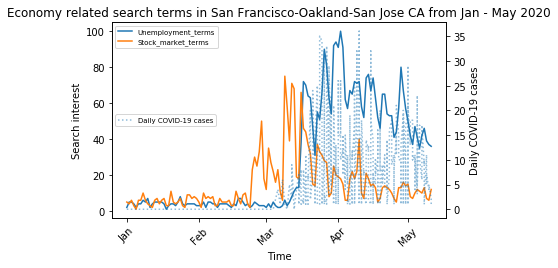

In [96]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

# ax.plot(economy_covid_df.Economy_terms)
# ax.plot(economy_covid_df.Recession_terms)
ax.plot(sf_economy_covid_df.Unemployment_terms)
ax.plot(sf_economy_covid_df.Stock_market_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(sf_economy_covid_df.daily, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Economy related search terms in San Francisco-Oakland-San Jose CA from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('sf/sf_economy_covid_plot.png', dpi = 200, bbox_inches='tight')

Responses x COVID

In [97]:
sf_responses_covid_df = sf_responses_df_clean.join(sf_covid_df).fillna(0)
sf_responses_covid_df.dtypes

Quarantine_terms      int64
Mask_terms            int64
Symptom_terms         int64
daily               float64
dtype: object

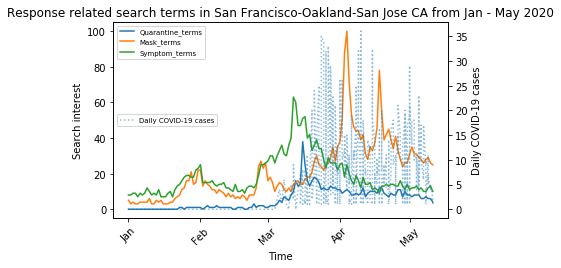

In [98]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

# ax.plot(responses_covid_df.Social_distancing_terms)
ax.plot(sf_responses_covid_df.Quarantine_terms)
ax.plot(sf_responses_covid_df.Mask_terms)
ax.plot(sf_responses_covid_df.Symptom_terms)
# ax.plot(responses_covid_df.Herd_immunity_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(sf_responses_covid_df.daily, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Response related search terms in San Francisco-Oakland-San Jose CA from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('sf/sf_responses_covid_plot.png', dpi = 200, bbox_inches='tight')

Travel x COVID

In [99]:
sf_travel_covid_df = sf_travel_df_clean.join(sf_covid_df).fillna(0)
sf_travel_covid_df.dtypes

Travel_terms       int64
Holiday_terms      int64
Flight_terms       int64
daily            float64
dtype: object

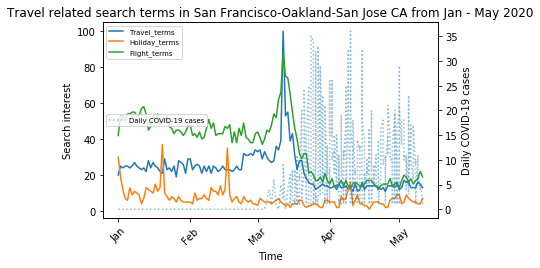

In [100]:
fig, ax = plt.subplots()

# Excluded several terms after feedback from mentors

ax.plot(sf_travel_covid_df.Travel_terms )
ax.plot(sf_travel_covid_df.Holiday_terms)
ax.plot(sf_travel_covid_df.Flight_terms)
# ax.plot(travel_covid_df.Domestic_flight_terms)
# ax.plot(travel_covid_df.International_flight_terms)
ax.set_xlabel("Time")
ax.set_ylabel("Search interest")

ax2 = ax.twinx()
ax2.plot(sf_travel_covid_df.daily, alpha = 0.5, linestyle = ':', label = "Daily COVID-19 cases")
ax2.set_ylabel("Daily COVID-19 cases")

date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

ax.legend(loc='upper left', prop ={'size': 7})
ax2.legend(loc='center left', prop ={'size': 7})

ax.set_title("Travel related search terms in San Francisco-Oakland-San Jose CA from Jan - May 2020")

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('sf/sf_travel_covid_plot.png', dpi = 200, bbox_inches='tight')